# L2　Regularization

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from srcs.modules.optimizer import SGD, Adam

from srcs.modules.functions import Softmax, np_log, numerical_gradient
from srcs.modules.activation import ReLU, Sigmoid
from srcs.modules.loss import cross_entropy, CrossEntropyLoss
from srcs.modules.init import he_normal, xavier_normal, normal

from srcs.modules.layer import Dense
from srcs.modules.model import Sequential
from srcs.modules.plot import plot_multiple_models
from srcs.dataloader import get_wdbc
from srcs.train import train_model
from srcs import train

seed = 42

In [14]:
X_train, X_valid, t_train, t_valid = get_wdbc(csv_path="../data/data.csv", train_size=0.5)


train NoL2

Metrics: 
 Train [Accuracy:0.9965, Precision:1.0000, Recall:0.9906, F1:0.9953]
 Valid [Accuracy:0.9472, Precision:0.9252, Recall:0.9340, F1:0.9296]

train UseL2

Metrics: 
 Train [Accuracy:0.9579, Precision:0.9608, Recall:0.9245, F1:0.9423]
 Valid [Accuracy:0.9472, Precision:0.9691, Recall:0.8868, F1:0.9261]


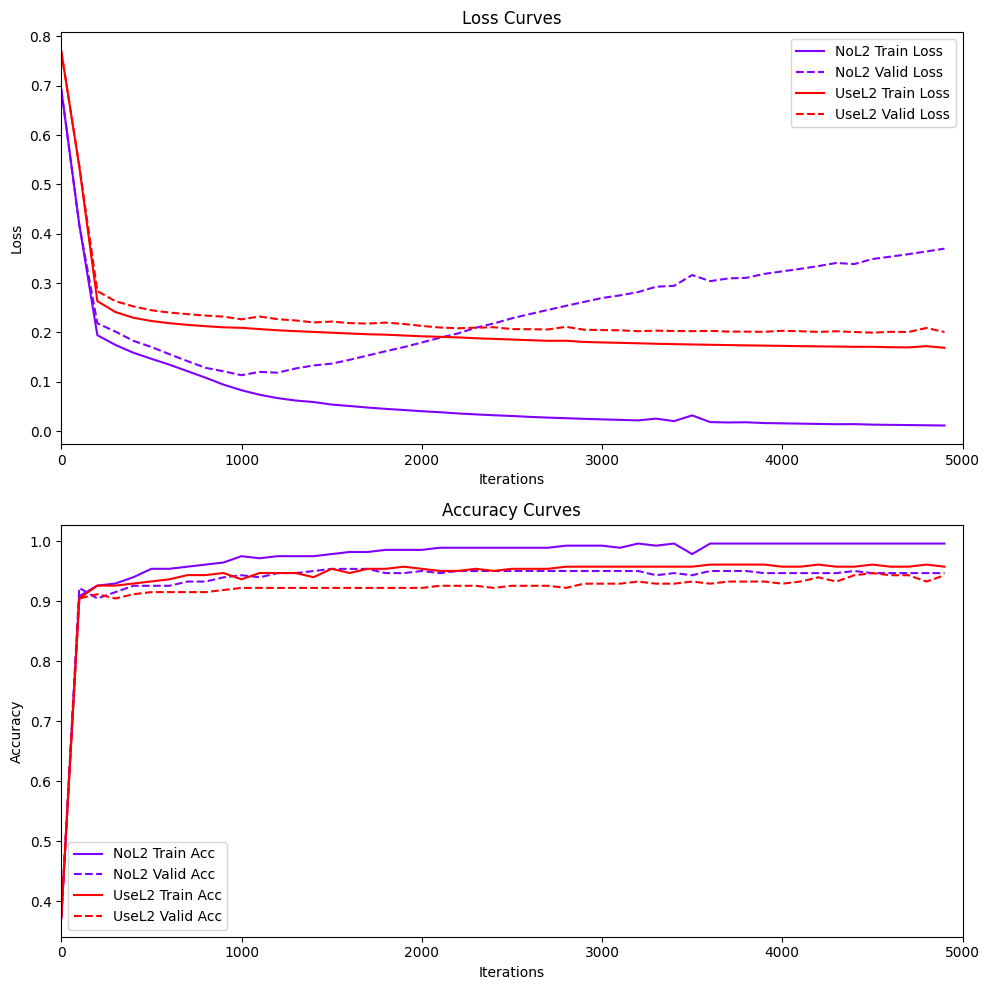

In [17]:
default_net = Sequential(
    layers=[
        Dense(in_features=30, out_features=200, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=200, out_features=100, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=100, out_features=50, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=50, out_features=2, activation=Softmax, init_method=normal, seed=seed)
    ],
    criteria=CrossEntropyLoss,
    optimizer=Adam(lr=0.0001),
)

l2_net = Sequential(
    layers=[
        Dense(in_features=30, out_features=200, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=200, out_features=100, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=100, out_features=50, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=50, out_features=2, activation=Softmax, init_method=normal, seed=seed)
    ],
    criteria=CrossEntropyLoss,
    optimizer=Adam(lr=0.0001),
    weight_decay=0.05,
)

models = {
    "NoL2"    : default_net,
    "UseL2"   : l2_net
}


models_results = []
max_itr = 5000
for name, model in models.items():
    print(f"\ntrain {name}")
    iterations, train_losses, train_accs, valid_losses, valid_accs = train_model(
        model=model,
        X_train=X_train,
        t_train=t_train,
        X_valid=X_valid,
        t_valid=t_valid,
        iters_num=max_itr,
        verbose=False,
        plot=False,
        metrics_interval=100,
        name="WDBC"
    )

    models_results.append({
        'name'          : name,
        'iterations'    : iterations,
        'train_losses'  : train_losses,
        'train_accs'    : train_accs,
        'valid_losses'  : valid_losses,
        'valid_accs'    : valid_accs
    })


plot_multiple_models(max_itr, models_results)
